<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/Borrador_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
import numpy as np

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import uniform
import statistics as stats
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Chapter 4&5
from sklearn.decomposition import PCA

# Chapter 6
from sklearn.decomposition import IncrementalPCA

# Chapter 7
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

from mpl_toolkits.mplot3d import Axes3D
#from pydiffmap import diffusion_map as dm
#from pydiffmap.visualization import data_plot

# Chapter 8
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import plotly.express as px 
import pandas as pd
url="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/train.xlsx?raw=true"
datos=pd.read_excel(url)
url1="https://github.com/roxyconstantine-dev/Proyecto-Final-de-An-lisis-Datos/blob/main/test.xlsx?raw=true"
test=pd.read_excel(url1)
test

,Ni,Co,Fe,SiO2,MgO,Al2O3,Cr2O3,Mn,Cu,Zn,Na,K,Frente
0,1.19,0.151,41.96,6.96,1.64,5.03,1.98,0.71,NaN,NaN,NaN,NaN,YN
1,1.32,0.074,28.71,21.43,7.19,2.71,1.27,0.57,NaN,NaN,NaN,NaN,YN
2,1.31,0.169,42.99,7.65,1.20,7.63,1.95,1.01,NaN,NaN,NaN,NaN,YN
3,0.82,0.130,37.50,10.27,6.37,8.31,1.16,0.82,NaN,NaN,NaN,NaN,CE
4,1.16,0.150,47.89,2.21,0.42,6.56,NaN,0.89,0.02,0.04,0.03,0.01,CE
5,0.90,0.150,48.20,3.43,2.03,6.15,NaN,1.14,0.02,0.05,0.02,0.00,PG
6,0.68,0.110,42.42,2.77,0.47,12.51,1.39,0.57,0.01,0.02,0.17,0.00,YS
7,1.37,0.110,44.80,4.71,1.70,7.14,1.62,0.64,0.01,0.03,0.11,0.00,CE


In [172]:
datos.isnull().sum()

Ni          2
Co          2
Fe          2
SiO2        2
MgO         2
Al2O3       2
Cr2O3     116
Mn          2
Cu        232
Zn        232
Na        232
K         271
Frente      0
dtype: int64

In [173]:

datos


,Ni,Co,Fe,SiO2,MgO,Al2O3,Cr2O3,Mn,Cu,Zn,Na,K,Frente
0,1.23,0.130,42.01,8.46,2.98,4.85,2.00,1.00,0.02,0.03,0.21,0.01,YS
1,0.93,0.050,41.59,4.05,0.52,6.05,1.46,0.36,0.02,0.02,0.22,0.01,CE
2,1.10,0.070,44.80,5.87,0.40,14.41,1.35,0.55,0.02,0.02,0.22,0.01,CE
3,1.14,0.080,43.96,5.12,0.96,8.09,1.25,0.57,0.02,0.02,0.22,0.00,CE
4,1.11,0.090,43.98,4.85,0.40,9.99,1.30,0.64,0.02,0.02,0.15,0.01,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1.58,0.104,26.91,23.36,8.03,2.59,1.22,0.47,NaN,NaN,NaN,NaN,YS
406,1.41,0.184,44.37,6.66,1.46,6.23,1.97,0.85,NaN,NaN,NaN,NaN,CE
407,1.19,0.151,41.96,6.96,1.64,5.03,1.98,0.71,NaN,NaN,NaN,NaN,YS
408,1.32,0.074,28.71,21.43,7.19,2.71,1.27,0.57,NaN,NaN,NaN,NaN,YN


In [174]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
datos = datos.dropna(how='all')
datos2 = datos.fillna(0)
datos2
Y= datos2['Ni']
X = datos2.drop(['Frente','Cu','Zn','Na','K'], axis=1)

In [175]:
# Initilaize list 

X1 = list(range(410))
Y1 = list(datos2.iloc[:,1])

# Set figure

#plt.figure(figsize=(12,10))

# Plotly graph

plot = px.scatter(x=X1, y=Y1)
#plt.tick_params(axis="x",labelsize=15,rotation=90)
#plt.tight_layout()
# Display
plot.show()

Bueno:
parametros extraños: Ni=27/157/393

In [176]:
X1 = list(range(410))
Y1 = list(datos2.iloc[:,2])

# Set figure

#plt.figure(figsize=(12,10))

# Plotly graph

plot = px.scatter(x=X1, y=Y1)
#plt.tick_params(axis="x",labelsize=15,rotation=90)
#plt.tight_layout()
# Display
plot.show()

Aqui en el Cobalto vemos que el valor de 156/157 vuelve a ser un problema y tambien 199

In [177]:
X1 = list(range(410))
Y1 = list(datos2.iloc[:,3])

# Set figure

#plt.figure(figsize=(12,10))

# Plotly graph

plot = px.scatter(x=X1, y=Y1)
#plt.tick_params(axis="x",labelsize=15,rotation=90)
#plt.tight_layout()
# Display
plot.show()

Aqui en el hierro Fe el valor numero 15/18 son los mas extraños

In [178]:
X1 = list(range(410))
Y1 = list(datos2.iloc[:,4])

# Set figure

#plt.figure(figsize=(12,10))

# Plotly graph

plot = px.scatter(x=X1, y=Y1)
#plt.tick_params(axis="x",labelsize=15,rotation=90)
#plt.tight_layout()
# Display
plot.show()

In [179]:
X1 = list(range(410))
Y1 = list(datos2.iloc[:,5])

# Set figure

#plt.figure(figsize=(12,10))

# Plotly graph

plot = px.scatter(x=X1, y=Y1)
#plt.tick_params(axis="x",labelsize=15,rotation=90)
#plt.tight_layout()
# Display
plot.show()

En este los valores problematicos serian 156(de nuevo)/301/392


In [180]:
X1 = list(range(410))
Y1 = list(datos2.iloc[:,7])

# Set figure

#plt.figure(figsize=(12,10))

# Plotly graph

plot = px.scatter(x=X1, y=Y1)
#plt.tick_params(axis="x",labelsize=15,rotation=90)
#plt.tight_layout()
# Display
plot.show()

En el Mn,es la muestra 292 la que tieen valores mas "extraños".Y vuelva a reincidor los valores 156 y 157.

In [181]:
datos2.drop([15,18,27,39,157,77,71,393,156,292,157,301,392,301,199],axis=0)

,Ni,Co,Fe,SiO2,MgO,Al2O3,Cr2O3,Mn,Cu,Zn,Na,K,Frente
0,1.23,0.130,42.01,8.46,2.98,4.85,2.00,1.00,0.02,0.03,0.21,0.01,YS
1,0.93,0.050,41.59,4.05,0.52,6.05,1.46,0.36,0.02,0.02,0.22,0.01,CE
2,1.10,0.070,44.80,5.87,0.40,14.41,1.35,0.55,0.02,0.02,0.22,0.01,CE
3,1.14,0.080,43.96,5.12,0.96,8.09,1.25,0.57,0.02,0.02,0.22,0.00,CE
4,1.11,0.090,43.98,4.85,0.40,9.99,1.30,0.64,0.02,0.02,0.15,0.01,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,1.58,0.104,26.91,23.36,8.03,2.59,1.22,0.47,0.00,0.00,0.00,0.00,YS
406,1.41,0.184,44.37,6.66,1.46,6.23,1.97,0.85,0.00,0.00,0.00,0.00,CE
407,1.19,0.151,41.96,6.96,1.64,5.03,1.98,0.71,0.00,0.00,0.00,0.00,YS
408,1.32,0.074,28.71,21.43,7.19,2.71,1.27,0.57,0.00,0.00,0.00,0.00,YN


In [182]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.615     , 0.39393939, 0.83518887, ..., 0.28886242, 0.42462845,
        0.33333333],
       [0.465     , 0.15151515, 0.82683897, ..., 0.36033353, 0.30997877,
        0.12      ],
       [0.55      , 0.21212121, 0.89065606, ..., 0.85824896, 0.2866242 ,
        0.18333333],
       ...,
       [0.595     , 0.45757576, 0.83419483, ..., 0.29958309, 0.42038217,
        0.23666667],
       [0.66      , 0.22424242, 0.57077535, ..., 0.1614056 , 0.26963907,
        0.19      ],
       [0.655     , 0.51212121, 0.85467197, ..., 0.45443716, 0.41401274,
        0.33666667]])

In [183]:

sc = StandardScaler()
#X = X.values
X_std =  sc.fit_transform(X)  
cov_matrix = np.cov(X_std.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(X_std)

[[ 0.55139609  0.22157057  0.25856523 ... -0.80113056  0.49174961
   0.80233925]
 [-0.46298798 -1.17096706  0.20735536 ... -0.30049392  0.0038127
  -1.19475636]
 [ 0.11182966 -0.82283265  0.59874507 ...  3.1872747  -0.09558186
  -0.6018686 ]
 ...
 [ 0.41614488  0.58711169  0.25246882 ... -0.72603507  0.47367788
  -0.1025947 ]
 [ 0.85571131 -0.75320577 -1.36308061 ... -1.69393258 -0.16786881
  -0.53945936]
 [ 0.82189851  0.90043266  0.37805492 ...  0.35867766  0.44657027
   0.83354387]]


In [184]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)] 
cum_var_exp = np.cumsum(var_explained)


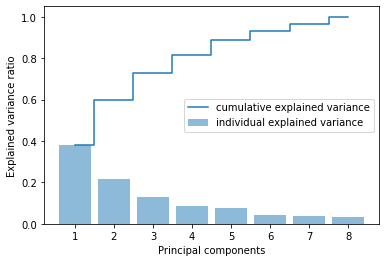

In [186]:
plt.bar(range(1,len(var_explained)+1), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,len(var_explained)+1),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [187]:
pca = PCA(n_components = 6)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.explained_variance_ratio_

array([0.38276848, 0.21500091, 0.13009086, 0.08781107, 0.07393151,
       0.0408278 ])

In [188]:
pca.explained_variance_ratio_.sum()

0.9304306324415724

In [189]:
pca = PCA(n_components = 0.9)
pca.fit(X_std)
x_pca = pca.transform(X_std)
pca.n_components_

6

In [190]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6).fit(X)
principal_comps = pca.transform(X)
pca_db = pd.DataFrame(data = principal_comps, columns=['pca1', 'pca2','pca3','pca4','pca5','pca6'])
pca_db

,pca1,pca2,pca3,pca4,pca5,pca6
0,-0.032586,0.059635,-0.160031,-0.061675,0.081752,-0.010961
1,-0.065274,0.101174,0.219850,-0.148883,0.063615,0.042030
2,-0.236561,0.063502,0.211994,0.007041,-0.397722,0.013924
3,-0.109088,0.012327,0.114690,-0.128620,-0.085022,0.019653
4,-0.175962,0.011340,0.119028,-0.063371,-0.164824,0.032371
...,...,...,...,...,...,...
405,0.517922,0.018693,-0.180670,-0.111177,0.015508,0.103298
406,-0.154501,-0.006531,-0.261850,-0.062419,0.006808,0.006532
407,-0.089729,0.047782,-0.137860,-0.056333,0.100970,0.018016
408,0.455004,0.054795,-0.055747,-0.090051,0.064679,0.083908


In [191]:
pca_db.var()

pca1    0.080823
pca2    0.061454
pca3    0.030449
pca4    0.016356
pca5    0.013393
pca6    0.009449
dtype: float64

In [220]:
# Adicionemos ahora la columna con la clase correcta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split



x_train=pca_db
FRENTE_MAPEO = {'YS':1, 'CE':2,'YN':3,'PG':4 ,'NA':5,'0':6}
pca_db['Ni']=Y

pca_db

,pca1,pca2,pca3,pca4,pca5,pca6,Ni
0,-0.032586,0.059635,-0.160031,-0.061675,0.081752,-0.010961,1.23
1,-0.065274,0.101174,0.219850,-0.148883,0.063615,0.042030,0.93
2,-0.236561,0.063502,0.211994,0.007041,-0.397722,0.013924,1.10
3,-0.109088,0.012327,0.114690,-0.128620,-0.085022,0.019653,1.14
4,-0.175962,0.011340,0.119028,-0.063371,-0.164824,0.032371,1.11
...,...,...,...,...,...,...,...
405,0.517922,0.018693,-0.180670,-0.111177,0.015508,0.103298,1.58
406,-0.154501,-0.006531,-0.261850,-0.062419,0.006808,0.006532,1.41
407,-0.089729,0.047782,-0.137860,-0.056333,0.100970,0.018016,1.19
408,0.455004,0.054795,-0.055747,-0.090051,0.064679,0.083908,1.32


Se formaron 4 columnas que contienen la mayor cantidad de información que es el "resumen" de los comportamientos de todos los quimicos en las muestras.Pero sería interesante conocer que combinación de variables conforman a las componentes.

In [195]:
pca.components_


array([[ 1.58402744e-01, -2.50516518e-01, -4.66051062e-01,
         4.22096943e-01,  6.07498586e-01, -2.96540780e-01,
        -2.00387989e-01, -1.40122483e-01],
       [ 3.00204955e-04, -4.15275478e-01, -1.33057597e-01,
         5.42294414e-02, -3.68839393e-02,  5.11122240e-02,
         8.78627948e-01, -1.75900757e-01],
       [-5.99175707e-01, -5.80658604e-01,  1.21551569e-02,
        -8.37913989e-02, -1.20795016e-01,  1.88265053e-01,
        -3.53148402e-01, -3.49150900e-01],
       [-5.98567165e-01,  4.41243247e-01, -3.79804897e-01,
         1.00942531e-01,  2.69020150e-01,  3.88908422e-01,
         1.73193735e-01,  1.97390277e-01],
       [-4.43155612e-01,  1.49545966e-01, -4.13784526e-02,
        -2.15292864e-01, -7.41456677e-02, -8.43805852e-01,
         1.25067008e-01,  6.18561615e-03],
       [ 1.44689568e-01, -7.93289370e-03, -7.22839552e-01,
         4.45932423e-02, -6.57340501e-01, -1.38570135e-02,
        -1.27252922e-01,  7.76824622e-02]])

Como se logra observar en los componentes , existen compuestos quimicos que influyen más en cada componente:

PCA1: Zn,Cu,Cr203(Siendo el Cr203 el que mas información distinta al resto aporta) 

PCA2:K,MgO,Fe(Siendo el Fe el que aporta más información diferente del resto)

PCA3:K,AL203,Cr203  

PCA4:Co,Mn




In [196]:
print(pca.explained_variance_ratio_)

[0.36152367 0.2748845  0.13619922 0.0731617  0.05990635 0.04226395]


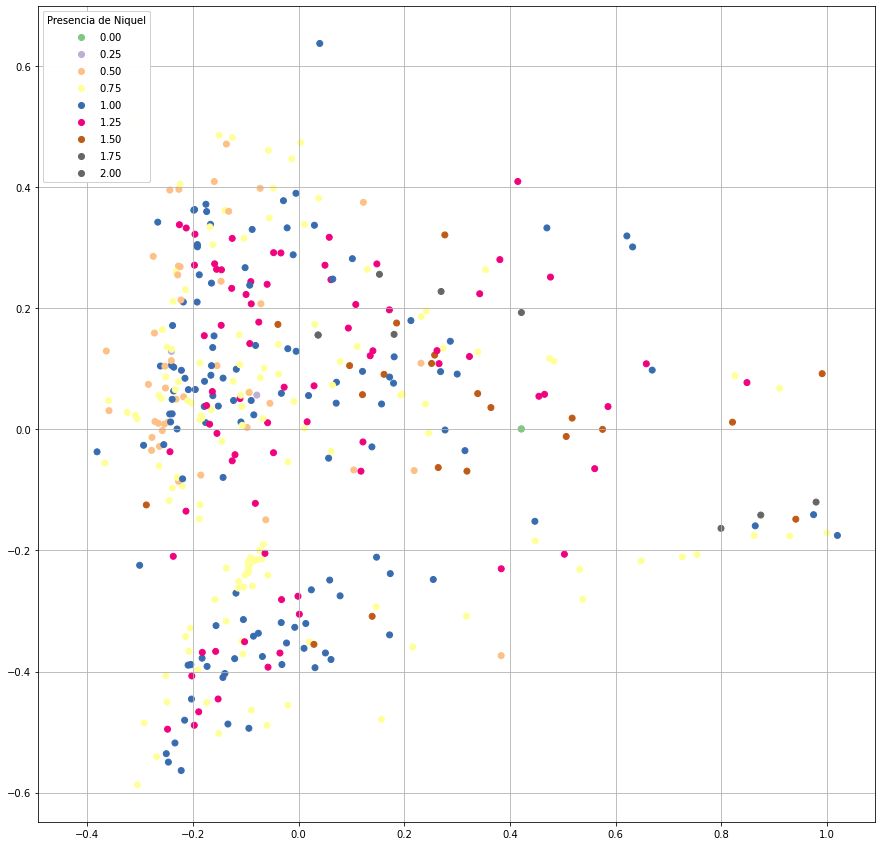

In [215]:
# y visualicemos el resultado
fig, ax = plt.subplots(figsize=(15, 15))
scatter = ax.scatter(pca_db['pca1'], pca_db['pca2'],c=pca_db['Ni'], cmap="Accent")
legend1 = ax.legend(*scatter.legend_elements(),loc="upper left", title="Presencia de Niquel")
ax.add_artist(legend1)
ax.grid(True)
plt.show()

In [ ]:
y_test= test['Ni']
x_test= test.drop(['Frente','Cu','Zn','Na','K','Ni'], axis=1)
x_test =x_test.fillna(0)
scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)#A los valores de prueba hayn que normalizarlos tambien
y_test,x_test


In [ ]:
# Entrenemos el modelo
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=1000, tol=1e-3)
y_train=Y
#x_train=pca_db.drop['Ni']
model.fit(x_train, y_train)

In [223]:
from sklearn import metrics

predicted_train = model.predict(x_train)
metrics.accuracy_score(y_train, predicted_train)

AttributeError: ignored

In [147]:
#Llevando los componentes de pruba al mismo redimensionamiento que los de entrenamiento
x_reduced=pca_db
x_train, x_test, y_train, y_test = train_test_split(x_reduced, Y, test_size = 0.2, random_state = 1) 


In [ ]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), PCA(n_components=6), SGDClassifier(max_iter=10000, tol=1e-3))    

pipe.fit(x_train, y_train)
pipe_test = pipe.predict(x_test)
metrics.accuracy_score(y_test, pipe_test)

Con una correlación del 0.67073 con los datos de prueba (que no participan en el entrenamiento del sistema) y luego de varios intentos se procede a mantener 4 componentes principales.

In [ ]:
import seaborn as sn
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 400):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sn.lineplot(x=list(range(1, 400)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

In [152]:
X = pca_db
X

,pca1,pca2,pca3,pca4,pca5,pca6,class
0,-0.032586,0.059635,-0.160031,-0.061675,0.081752,-0.010961,1
1,-0.065274,0.101174,0.219850,-0.148883,0.063615,0.042030,2
2,-0.236561,0.063502,0.211994,0.007041,-0.397722,0.013924,2
3,-0.109088,0.012327,0.114690,-0.128620,-0.085022,0.019653,2
4,-0.175962,0.011340,0.119028,-0.063371,-0.164824,0.032371,2
...,...,...,...,...,...,...,...
405,0.517922,0.018693,-0.180670,-0.111177,0.015508,0.103298,1
406,-0.154501,-0.006531,-0.261850,-0.062419,0.006808,0.006532,2
407,-0.089729,0.047782,-0.137860,-0.056333,0.100970,0.018016,1
408,0.455004,0.054795,-0.055747,-0.090051,0.064679,0.083908,3


In [150]:
# 20 cluster
km20= KMeans(n_clusters=20).fit(X)

X['Labels'] = km20.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls',20), cmap="Dark1")
plt.title('KMeans  20 Clusters')
plt.show()

IndexError: ignored

In [ ]:
# 10 cluster
km10= KMeans(n_clusters=50).fit(X)

X['Labels'] = km10.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 50),)
plt.title('KMeans con 10 Clusters')
plt.show()

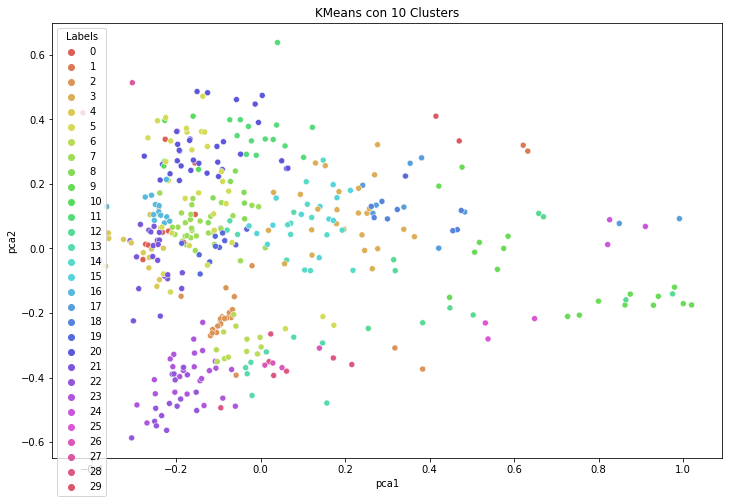

In [ ]:
# 10 cluster
km15 = KMeans(n_clusters=30).fit(X)

X['Labels'] = km15.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=X['pca1'], y=X['pca2'], hue=X['Labels'], 
                palette=sn.color_palette('hls', 30))
plt.title('KMeans con 10 Clusters')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

24.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning:

32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.p

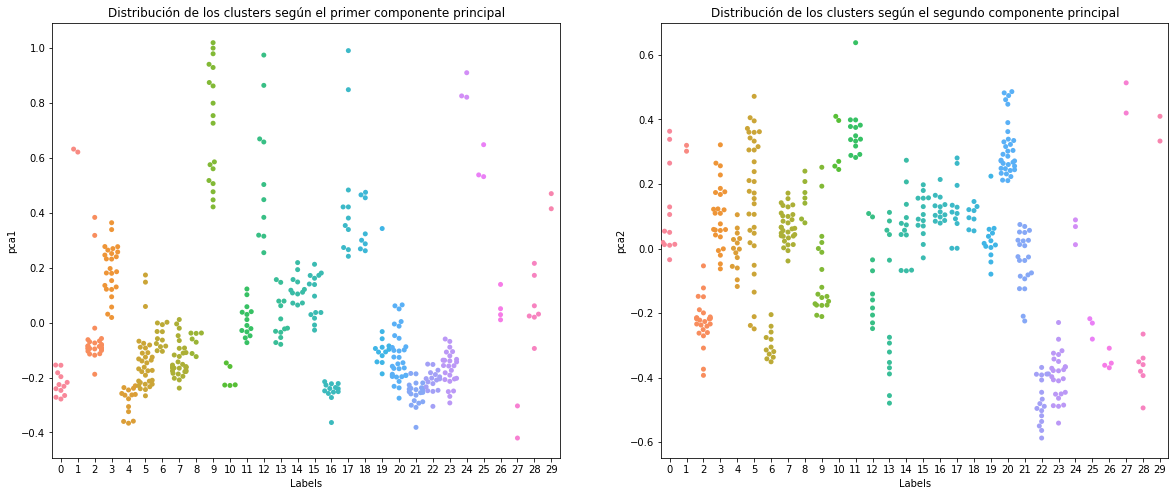

In [ ]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sn.swarmplot(x='Labels', y='pca1', data=X, ax=ax)
ax.set_title('Distribución de los clusters según el primer componente principal')

ax = fig.add_subplot(122)
sn.swarmplot(x='Labels', y='pca2', data=X, ax=ax)
ax.set_title('Distribución de los clusters según el segundo componente principal')
plt.show()